In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as ss
from os import listdir

In [2]:
pd.read_csv('Full Data.csv')

,Single Image Frame,x00,y00,z00,x01,y01,z01,x02,y02,z02,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,Label
0,C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...,0.301750,0.737279,-0.000035,0.337051,0.777063,-0.212934,0.400149,0.734345,-0.316929,...,0.331659,0.324991,-0.084233,0.336295,0.247291,-0.113173,0.341211,0.185430,-0.127174,0
1,C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...,0.299187,0.745403,-0.000015,0.333952,0.781933,-0.201781,0.398500,0.737427,-0.298013,...,0.341950,0.327376,-0.067972,0.339404,0.236627,-0.099826,0.338317,0.162004,-0.117488,0
2,C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...,0.299001,0.716623,-0.000007,0.325937,0.757997,-0.214778,0.378859,0.715401,-0.312374,...,0.350529,0.348654,-0.070743,0.357185,0.332315,-0.079358,0.363438,0.327121,-0.078772,0
3,C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...,0.299578,0.718547,0.000021,0.330655,0.768182,-0.208415,0.383243,0.733616,-0.303154,...,0.356259,0.357156,-0.096008,0.362714,0.335595,-0.107148,0.368032,0.326843,-0.109620,0
4,C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...,0.300124,0.728031,-0.000006,0.334805,0.775457,-0.213824,0.394578,0.739853,-0.316968,...,0.345162,0.315613,-0.084376,0.341890,0.230606,-0.110719,0.340986,0.161739,-0.124075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46995,D:\Thesis\Single letter\Zilani\Sign 36 - Chand...,0.449485,0.737152,-0.000047,0.551435,0.678444,0.002933,0.601849,0.560745,-0.026944,...,0.367527,0.510548,0.088274,0.391891,0.532243,0.122078,0.403651,0.568490,0.127304,36
46996,D:\Thesis\Single letter\Zilani\Sign 36 - Chand...,0.437714,0.702396,-0.000088,0.536707,0.656265,-0.003243,0.592203,0.557794,-0.025234,...,0.368928,0.502504,0.104390,0.383679,0.523780,0.125548,0.388573,0.554462,0.127897,36
46997,D:\Thesis\Single letter\Zilani\Sign 36 - Chand...,0.440171,0.695180,-0.000087,0.534765,0.654408,0.000616,0.586132,0.558977,-0.013993,...,0.373558,0.506448,0.113235,0.386796,0.527082,0.130508,0.392315,0.557867,0.132667,36
46998,D:\Thesis\Single letter\Zilani\Sign 36 - Chand...,0.441706,0.748313,-0.000088,0.545528,0.685874,0.014617,0.595650,0.562014,-0.002213,...,0.362908,0.511546,0.132779,0.387904,0.537643,0.160743,0.399389,0.573847,0.162468,36


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('Full Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
dataset_path = "Full Data.csv"  # Replace with the path to your dataset
df = pd.read_csv(dataset_path)

In [5]:
features = df.iloc[:,1:-1]
labels = df.iloc[:,-1]

In [6]:
features

,x00,y00,z00,x01,y01,z01,x02,y02,z02,x03,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.301750,0.737279,-0.000035,0.337051,0.777063,-0.212934,0.400149,0.734345,-0.316929,0.476312,...,-0.045282,0.331659,0.324991,-0.084233,0.336295,0.247291,-0.113173,0.341211,0.185430,-0.127174
1,0.299187,0.745403,-0.000015,0.333952,0.781933,-0.201781,0.398500,0.737427,-0.298013,0.480033,...,-0.033100,0.341950,0.327376,-0.067972,0.339404,0.236627,-0.099826,0.338317,0.162004,-0.117488
2,0.299001,0.716623,-0.000007,0.325937,0.757997,-0.214778,0.378859,0.715401,-0.312374,0.457142,...,-0.028887,0.350529,0.348654,-0.070743,0.357185,0.332315,-0.079358,0.363438,0.327121,-0.078772
3,0.299578,0.718547,0.000021,0.330655,0.768182,-0.208415,0.383243,0.733616,-0.303154,0.457973,...,-0.042933,0.356259,0.357156,-0.096008,0.362714,0.335595,-0.107148,0.368032,0.326843,-0.109620
4,0.300124,0.728031,-0.000006,0.334805,0.775457,-0.213824,0.394578,0.739853,-0.316968,0.474460,...,-0.040199,0.345162,0.315613,-0.084376,0.341890,0.230606,-0.110719,0.340986,0.161739,-0.124075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46995,0.449485,0.737152,-0.000047,0.551435,0.678444,0.002933,0.601849,0.560745,-0.026944,0.647663,...,0.006125,0.367527,0.510548,0.088274,0.391891,0.532243,0.122078,0.403651,0.568490,0.127304
46996,0.437714,0.702396,-0.000088,0.536707,0.656265,-0.003243,0.592203,0.557794,-0.025234,0.635515,...,0.039165,0.368928,0.502504,0.104390,0.383679,0.523780,0.125548,0.388573,0.554462,0.127897
46997,0.440171,0.695180,-0.000087,0.534765,0.654408,0.000616,0.586132,0.558977,-0.013993,0.626571,...,0.049661,0.373558,0.506448,0.113235,0.386796,0.527082,0.130508,0.392315,0.557867,0.132667
46998,0.441706,0.748313,-0.000088,0.545528,0.685874,0.014617,0.595650,0.562014,-0.002213,0.641644,...,0.044154,0.362908,0.511546,0.132779,0.387904,0.537643,0.160743,0.399389,0.573847,0.162468


In [7]:
features_np = np.array(features)

In [8]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x = sc_X.fit_transform(features_np)
y = labels

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_predKNN = modelKNN.predict(x_test)

scores = cross_val_score(modelKNN, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_KNN = (mean(scores)*100)
print('Accuracy (KNN) : %.2f' % accuracy_KNN, '%')

Accuracy (KNN) : 81.14 %


<Axes: >

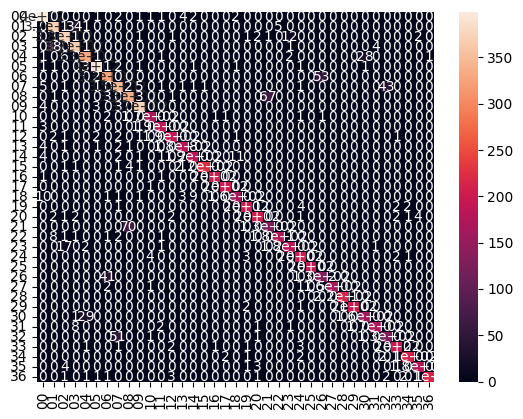

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_KNN = confusion_matrix(y_test, y_predKNN)

xAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
yAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']

ss.heatmap(confusionMatrix_KNN, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [13]:
from sklearn.svm import SVC

modelSVM_Poly = SVC(kernel = 'poly', degree=3)
modelSVM_Poly.fit(x_train, y_train)

SVC(kernel='poly')

In [14]:
y_predSVM_Poly = modelSVM_Poly.predict(x_test)

scores = cross_val_score(modelSVM_Poly, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_SVM_Poly = (mean(scores)*100)
print('Accuracy (SVM - Pol) : %.2f' % accuracy_SVM_Poly, '%')

Accuracy (SVM - Pol) : 70.23 %


<Axes: >

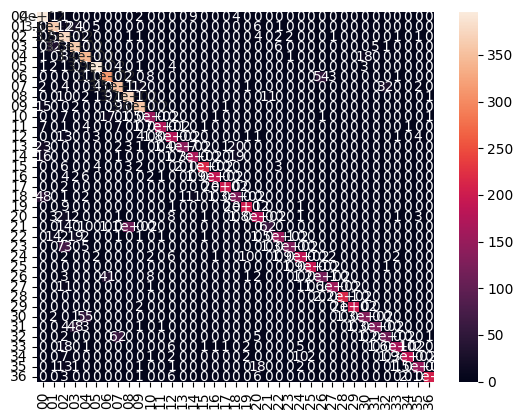

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_SVM_Poly = confusion_matrix(y_test, y_predSVM_Poly)

xAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
yAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']

ss.heatmap(confusionMatrix_SVM_Poly, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [16]:
from sklearn.svm import SVC

modelSVM_RBF = SVC(kernel = 'rbf', degree=5)
modelSVM_RBF.fit(x_train, y_train)

SVC(degree=5)

In [17]:
y_predSVM_RBF = modelSVM_RBF.predict(x_test)

scores = cross_val_score(modelSVM_RBF, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_SVM_RBF = (mean(scores)*100)
print('Accuracy (SVM - RBF) : %.2f' % accuracy_SVM_RBF, '%')

Accuracy (SVM - RBF) : 80.98 %


<Axes: >

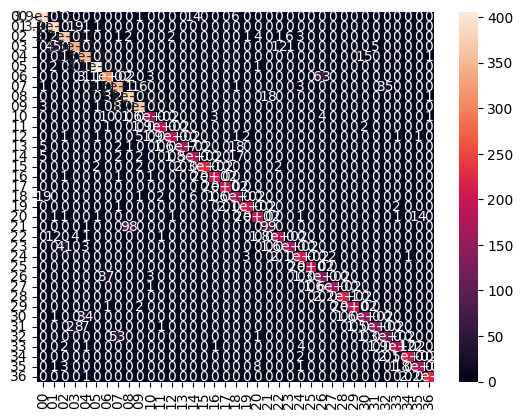

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_SVM_RBF = confusion_matrix(y_test, y_predSVM_RBF)

xAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
yAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']

ss.heatmap(confusionMatrix_SVM_RBF, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(64, input_shape = x_train[0].shape))

classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(rate=0.3))

classifier.add(Dense(74, activation='relu'))
classifier.add(Dropout(rate=0.3))

classifier.add(Dense(37, activation='softmax'))

classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
classifier.fit(x_train, y_train, epochs=20, batch_size=37)

Epoch 1/20


C:\Users\Yeastic's Creation\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1017/1017 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2926 - loss: 2.3852
Epoch 2/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6503 - loss: 0.9029
Epoch 3/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7294 - loss: 0.6842
Epoch 4/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7713 - loss: 0.5693
Epoch 5/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7906 - loss: 0.5164
Epoch 6/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8067 - loss: 0.4717
Epoch 7/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8234 - loss: 0.4253
Epoch 8/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8339 - loss: 0.4105
Epoch 9/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8426 - loss: 0.3866
Epoch 10/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8444 - loss: 0.3780
Epoch 11/20
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8523 - loss: 0.3567
Epoch 12/20
1017/1017 ━━━━━━━━━━━━━━━━━━━

In [20]:
print("Evaluation on test data : ")
results = classifier.evaluate(x_test, y_test, batch_size=50)
accuracyANN = results[1]*100
print("Test Accuracy : %.2f" % accuracyANN,'%')

Evaluation on test data : 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.9309 - loss: 0.1803
Test Accuracy : 92.80 %


In [21]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(n_estimators = 10, criterion = 'gini')
modelRFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [22]:
y_predRFC = modelRFC.predict(x_test)

scores = cross_val_score(modelRFC, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_RFC = (mean(scores)*100)
print('Accuracy (RFC) : %.2f' % accuracy_RFC, '%')

Accuracy (RFC) : 83.51 %


<Axes: >

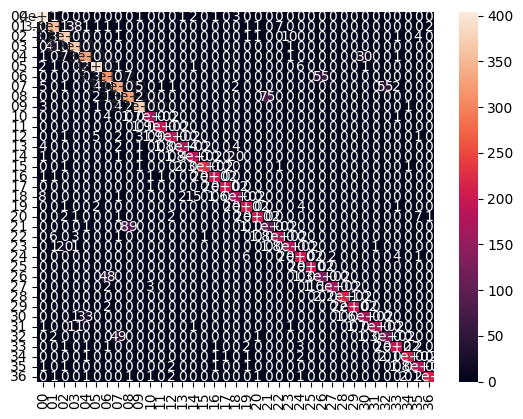

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_RFC = confusion_matrix(y_test, y_predRFC)

xAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
yAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']

ss.heatmap(confusionMatrix_RFC, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [24]:
from sklearn.tree import DecisionTreeClassifier
#modelDTC = DecisionTreeClassifier(criterion = 'entropy')
modelDTC = DecisionTreeClassifier(criterion = 'gini')
modelDTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
y_predDTC = modelDTC.predict(x_test)

scores = cross_val_score(modelDTC, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_DTC = (mean(scores)*100)
print('Accuracy in SVM Classifier (with cv) : %.2f' % accuracy_DTC, '%')

Accuracy in SVM Classifier (with cv) : 74.13 %


<Axes: >

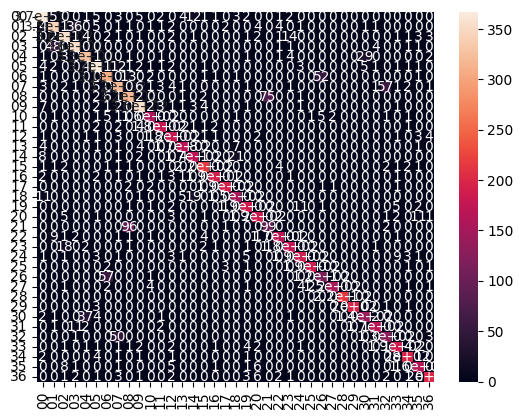

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_DTC = confusion_matrix(y_test, y_predDTC)

xAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
yAxisLabels = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']

ss.heatmap(confusionMatrix_DTC, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

C:\Users\Yeastic's Creation\AppData\Local\Temp\ipykernel_32424\3188736872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.barplot(x='Category', y='Values', palette="Greens_d", linewidth=1, data=df)


<Axes: xlabel='Category', ylabel='Values'>

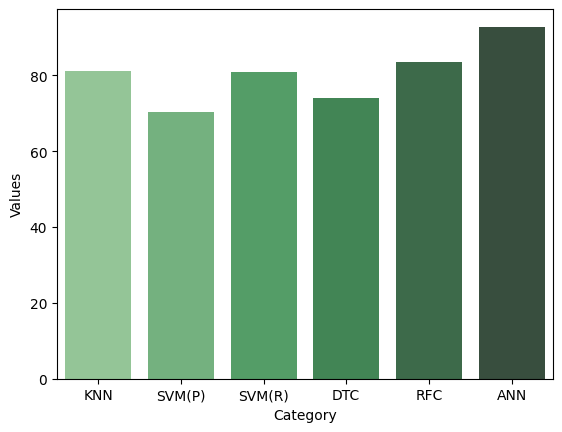

In [27]:
data = {'Category': [ 'KNN', 'SVM(P)', 'SVM(R)', 'DTC', 'RFC', 'ANN'],
        'Values': [accuracy_KNN, accuracy_SVM_Poly, accuracy_SVM_RBF, accuracy_DTC, accuracy_RFC, accuracyANN]}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar plot
ss.barplot(x='Category', y='Values', palette="Greens_d", linewidth=1, data=df)

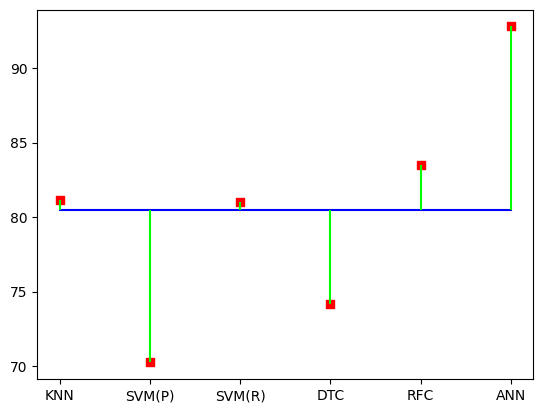

In [28]:
xAxis = ['KNN', 'SVM(P)', 'SVM(R)', 'DTC', 'RFC', 'ANN' ]
yAxis = [accuracy_KNN, accuracy_SVM_Poly, accuracy_SVM_RBF, accuracy_DTC, accuracy_RFC, accuracyANN]

accuracyMean = [ np.mean(yAxis) for i in range(len(yAxis))]
plt.scatter(xAxis, yAxis, c ='red', marker= 's')
plt.plot(xAxis, accuracyMean, c = 'Blue')
plt.vlines(xAxis, yAxis, accuracyMean, colors = 'lime')

In [29]:
features_np = np.array(features)

In [30]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x = sc_X.fit_transform(features_np)
y = labels

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=10)
modelKNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
y_predKNN = modelKNN.predict(x_test)

scores = cross_val_score(modelKNN, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_KNN = (mean(scores)*100)
print('Accuracy (KNN) : %.2f' % accuracy_KNN, '%')

Accuracy (KNN) : 75.32 %


<Axes: >

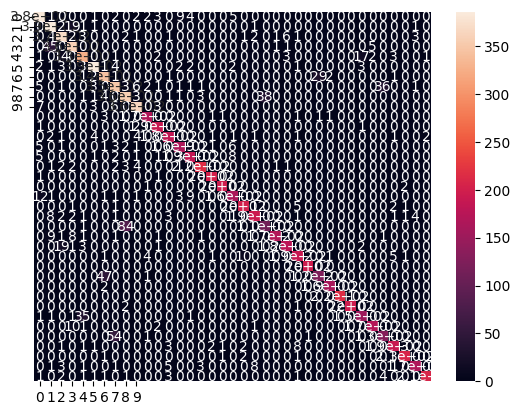

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_KNN = confusion_matrix(y_test, y_predKNN)

xAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
yAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

ss.heatmap(confusionMatrix_KNN, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [35]:
from sklearn.svm import SVC

modelSVM_Linear = SVC(kernel = 'linear')
modelSVM_Linear.fit(x_train, y_train)

SVC(kernel='linear')

In [36]:
y_predSVM_Linear = modelSVM_Linear.predict(x_test)

scores = cross_val_score(modelSVM_Linear, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_SVM_Lin = (mean(scores)*100)
print('Accuracy (SVM - Lin) : %.2f' % accuracy_SVM_Lin, '%')

Accuracy (SVM - Lin) : 82.66 %


<Axes: >

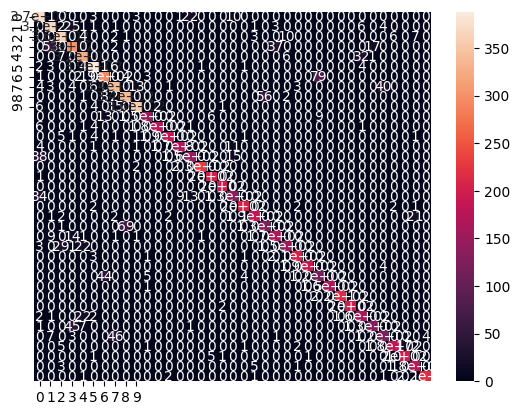

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_SVM_Lin = confusion_matrix(y_test, y_predSVM_Linear)

xAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
yAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

ss.heatmap(confusionMatrix_SVM_Lin, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [38]:
from sklearn.svm import SVC

modelSVM_Poly = SVC(kernel = 'poly', degree=3)
modelSVM_Poly.fit(x_train, y_train)

SVC(kernel='poly')

In [39]:
y_predSVM_Poly = modelSVM_Poly.predict(x_test)

scores = cross_val_score(modelSVM_Poly, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_SVM_Poly = (mean(scores)*100)
print('Accuracy (SVM - Pol) : %.2f' % accuracy_SVM_Poly, '%')

Accuracy (SVM - Pol) : 70.23 %


<Axes: >

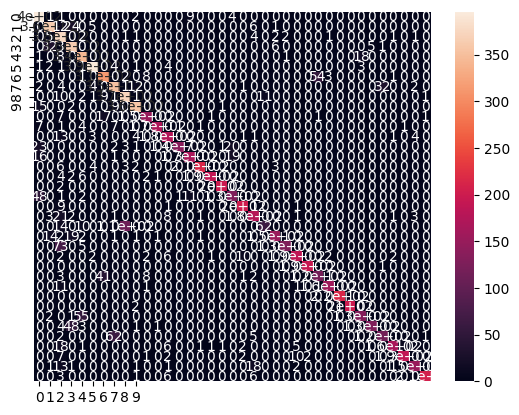

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_SVM_Poly = confusion_matrix(y_test, y_predSVM_Poly)

xAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
yAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

ss.heatmap(confusionMatrix_SVM_Poly, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [41]:
from sklearn.svm import SVC

modelSVM_RBF = SVC(kernel = 'rbf', degree=5)
modelSVM_RBF.fit(x_train, y_train)

SVC(degree=5)

In [42]:
y_predSVM_RBF = modelSVM_RBF.predict(x_test)

scores = cross_val_score(modelSVM_RBF, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_SVM_RBF = (mean(scores)*100)
print('Accuracy (SVM - RBF) : %.2f' % accuracy_SVM_RBF, '%')

Accuracy (SVM - RBF) : 80.98 %


<Axes: >

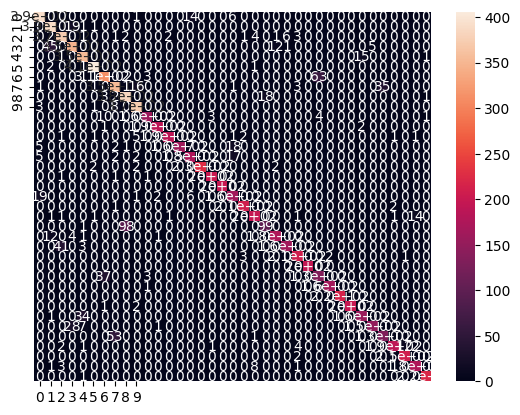

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_SVM_RBF = confusion_matrix(y_test, y_predSVM_RBF)

xAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
yAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

ss.heatmap(confusionMatrix_SVM_RBF, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [44]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
y_predXGB = modelXGB.predict(x_test)

scores = cross_val_score(modelXGB, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_XGB = (mean(scores)*100)
print('Accuracy (XGB)) : %.2f' % accuracy_XGB, '%')

Accuracy (XGB)) : 87.06 %


In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(64, input_shape = x_train[0].shape))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(rate=0.3))

classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(rate=0.3))

classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(rate=0.3))

classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(40, activation='softmax'))

classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
classifier.fit(features, labels, epochs=10, batch_size=40)

Epoch 1/10


C:\Users\Yeastic's Creation\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1175/1175 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1528 - loss: 2.8767
Epoch 2/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4859 - loss: 1.3544
Epoch 3/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5722 - loss: 1.0719
Epoch 4/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6162 - loss: 0.9505
Epoch 5/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6492 - loss: 0.8677
Epoch 6/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6714 - loss: 0.8110
Epoch 7/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6844 - loss: 0.7795
Epoch 8/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6963 - loss: 0.7441
Epoch 9/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7088 - loss: 0.7156
Epoch 10/10
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7131 - loss: 0.7003


In [47]:
print("Evaluation on test data : ")
results = classifier.evaluate(x_test, y_test, batch_size=40)
accuracyANN = results[1]*100
print("Test Accuracy : %.2f" % accuracyANN,'%')

Evaluation on test data : 
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.3634 - loss: 17.8669
Test Accuracy : 36.29 %


In [48]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(n_estimators = 10, criterion = 'gini')
modelRFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [49]:
y_predRFC = modelRFC.predict(x_test)

scores = cross_val_score(modelRFC, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_RFC = (mean(scores)*100)
print('Accuracy (RFC) : %.2f' % accuracy_RFC, '%')

Accuracy (RFC) : 83.50 %


<Axes: >

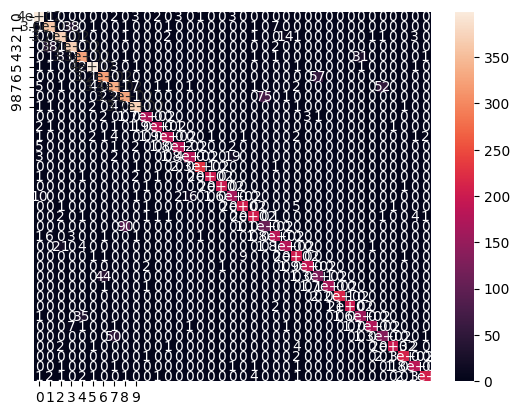

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_RFC = confusion_matrix(y_test, y_predRFC)

xAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
yAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

ss.heatmap(confusionMatrix_RFC, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

In [51]:
from sklearn.tree import DecisionTreeClassifier
# modelDTC = DecisionTreeClassifier(criterion = 'entropy')
modelDTC = DecisionTreeClassifier(criterion = 'gini')
modelDTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
y_predDTC = modelDTC.predict(x_test)

scores = cross_val_score(modelDTC, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy_DTC = (mean(scores)*100)
print('Accuracy in SVM Classifier (with cv) : %.2f' % accuracy_DTC, '%')

Accuracy in SVM Classifier (with cv) : 73.87 %


<Axes: >

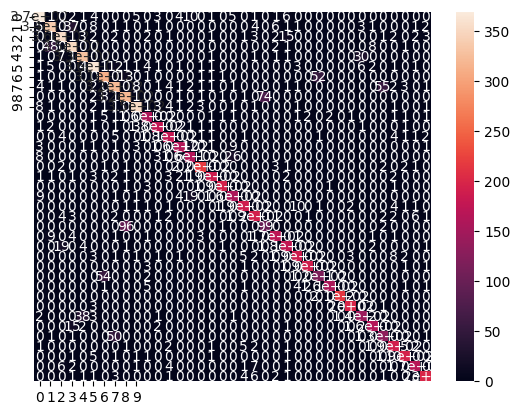

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as ss

confusionMatrix_DTC = confusion_matrix(y_test, y_predDTC)

xAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
yAxisLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

ss.heatmap(confusionMatrix_DTC, annot = True, xticklabels=xAxisLabels, yticklabels=yAxisLabels)

C:\Users\Yeastic's Creation\AppData\Local\Temp\ipykernel_32424\1146759182.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.barplot(x='Category', y='Values', palette="Oranges_d", linewidth=1, data=df)


<Axes: xlabel='Category', ylabel='Values'>

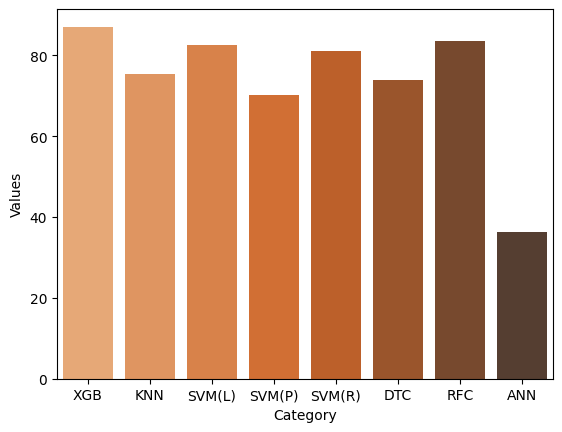

In [54]:
data = {'Category': ['XGB', 'KNN', 'SVM(L)', 'SVM(P)', 'SVM(R)', 'DTC', 'RFC', 'ANN'],
        'Values': [accuracy_XGB, accuracy_KNN, accuracy_SVM_Lin, accuracy_SVM_Poly, accuracy_SVM_RBF, accuracy_DTC, accuracy_RFC, accuracyANN]}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar plot
ss.barplot(x='Category', y='Values', palette="Oranges_d", linewidth=1, data=df)

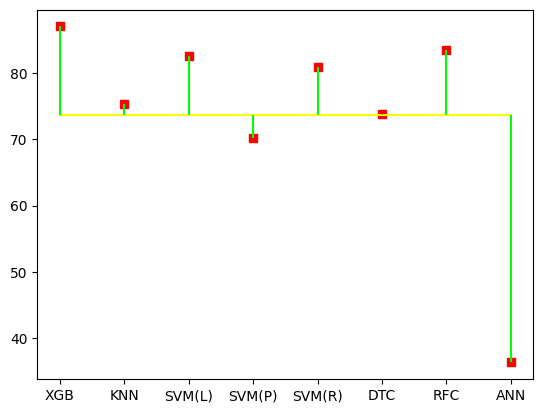

In [55]:
xAxis = ['XGB', 'KNN', 'SVM(L)', 'SVM(P)', 'SVM(R)', 'DTC', 'RFC', 'ANN' ]
yAxis = [accuracy_XGB, accuracy_KNN, accuracy_SVM_Lin, accuracy_SVM_Poly, accuracy_SVM_RBF, accuracy_DTC, accuracy_RFC, accuracyANN]

accuracyMean = [ np.mean(yAxis) for i in range(len(yAxis))]

plt.scatter(xAxis, yAxis, c ='red', marker= 's')
plt.plot(xAxis, accuracyMean, c = 'Yellow')
plt.vlines(xAxis, yAxis, accuracyMean, colors = 'lime')

In [56]:
features = df.iloc[:,-2]
labels = df.iloc[:,-2]

features_np = np.array(features)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_KNN = time.time()

modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(x_train, y_train)

y_predKNN = modelKNN.predict(x_test)

accuracy_KNN = accuracy_score(y_test, y_predKNN)
precision_KNN = precision_score(y_test, y_predKNN, average='weighted')
recall_KNN = recall_score(y_test, y_predKNN, average='weighted')
f1_KNN = f1_score(y_test, y_predKNN, average='weighted')

end_time_KNN = time.time()
time_KNN = end_time_KNN - start_time_KNN

print('KNN - Accuracy  : %.2f' % (accuracy_KNN*100), '%')
print('KNN - F1-Score  : %.2f' % (f1_KNN*100), '%')
print('KNN - Recall    : %.2f' % (recall_KNN*100), '%')
print('KNN - Precision : %.2f' % (precision_KNN*100), '%')
print('KNN - Time Taken : %.2f' % time_KNN, 'seconds')

KNN - Accuracy  : 92.20 %
KNN - F1-Score  : 92.21 %
KNN - Recall    : 92.20 %
KNN - Precision : 92.24 %
KNN - Time Taken : 1.21 seconds


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_LR = time.time()

modelLR = LogisticRegression(solver='newton-cg',max_iter=1000)
modelLR.fit(x_train, y_train)

y_predLR = modelLR.predict(x_test)

accuracy_LR = accuracy_score(y_test, y_predLR)
precision_LR = precision_score(y_test, y_predLR, average='weighted')
recall_LR = recall_score(y_test, y_predLR, average='weighted')
f1_LR = f1_score(y_test, y_predLR, average='weighted')

end_time_LR = time.time()
time_LR = end_time_LR - start_time_LR

print('LR - Accuracy  : %.2f' % (accuracy_LR*100), '%')
print('LR - F1-Score  : %.2f' % (f1_LR*100), '%')
print('LR - Recall    : %.2f' % (recall_LR*100), '%')
print('LR - Precision : %.2f' % (precision_LR*100), '%')
print('LR - Time Taken : %.2f' % time_LR, 'seconds')

LR - Accuracy  : 73.78 %
LR - F1-Score  : 73.71 %
LR - Recall    : 73.78 %
LR - Precision : 73.85 %
LR - Time Taken : 12.93 seconds


In [82]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_SVM = time.time()

modelSVM_RBF = SVC(kernel = 'rbf')
modelSVM_RBF.fit(x_train, y_train)

y_predSVM_RBF = modelSVM_RBF.predict(x_test)

accuracy_SVM = accuracy_score(y_test, y_predSVM_RBF)
precision_SVM = precision_score(y_test, y_predSVM_RBF, average='weighted')
recall_SVM = recall_score(y_test, y_predSVM_RBF, average='weighted')
f1_SVM = f1_score(y_test, y_predSVM_RBF, average='weighted')

end_time_SVM = time.time()
time_SVM = end_time_SVM - start_time_SVM

print('SVM - Accuracy  : %.2f' % (accuracy_SVM*100), '%')
print('SVM - F1-Score  : %.2f' % (f1_SVM*100), '%')
print('SVM - Recall    : %.2f' % (recall_SVM*100), '%')
print('SVM - Precision : %.2f' % (precision_SVM*100), '%')
print('SVM - Time Taken : %.2f' % time_SVM, 'seconds')

SVM - Accuracy  : 90.88 %
SVM - F1-Score  : 90.78 %
SVM - Recall    : 90.88 %
SVM - Precision : 91.13 %
SVM - Time Taken : 62.41 seconds


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_RFC = time.time()

modelRFC = RandomForestClassifier(n_estimators = 47, criterion = 'gini')
modelRFC.fit(x_train, y_train)

y_predRFC = modelRFC.predict(x_test)

accuracy_RFC = accuracy_score(y_test, y_predRFC)
precision_RFC = precision_score(y_test, y_predRFC, average='weighted')
recall_RFC = recall_score(y_test, y_predRFC, average='weighted')
f1_RFC = f1_score(y_test, y_predRFC, average='weighted')

end_time_RFC = time.time()
time_RFC = end_time_RFC - start_time_RFC

print('RFC - Accuracy  : %.2f' % (accuracy_RFC*100), '%')
print('RFC - F1-Score  : %.2f' % (precision_RFC*100), '%')
print('RFC - Recall    : %.2f' % (recall_RFC*100), '%')
print('RFC - Precision : %.2f' % (f1_RFC*100), '%')
print('RFC - Time Taken : %.2f' % time_RFC, 'seconds')

RFC - Accuracy  : 92.04 %
RFC - F1-Score  : 92.05 %
RFC - Recall    : 92.04 %
RFC - Precision : 92.03 %
RFC - Time Taken : 22.54 seconds


In [62]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_HGBC = time.time()

modelHGBC = HistGradientBoostingClassifier()
modelHGBC.fit(x_train, y_train)

y_predHGBC = modelHGBC.predict(x_test)

accuracy_HGBC = accuracy_score(y_test, y_predHGBC)
precision_HGBC = precision_score(y_test, y_predHGBC, average='weighted')
recall_HGBC = recall_score(y_test, y_predHGBC, average='weighted')
f1_HGBC = f1_score(y_test, y_predHGBC, average='weighted')

end_time_HGBC = time.time()
time_HGBC = end_time_HGBC - start_time_HGBC

print('HGBC - Accuracy  : %.2f' % (accuracy_HGBC*100), '%')
print('HGBC - F1-Score  : %.2f' % (f1_HGBC*100), '%')
print('HGBC - Recall    : %.2f' % (recall_HGBC*100), '%')
print('HGBC - Precision : %.2f' % (precision_HGBC*100), '%')
print('HGBC - Time Taken : %.2f' % time_HGBC, 'seconds')

HGBC - Accuracy  : 91.80 %
HGBC - F1-Score  : 91.81 %
HGBC - Recall    : 91.80 %
HGBC - Precision : 91.85 %
HGBC - Time Taken : 27.93 seconds


In [64]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


np.random.seed(123)

import time
start_time_GBM = time.time()

modelGBM = LGBMClassifier()
modelGBM.fit(x_train, y_train)

y_pred_GBM = modelGBM.predict(x_test)

accuracy_GBM = accuracy_score(y_test, y_pred_GBM)
precision_GBM = precision_score(y_test, y_pred_GBM, average='weighted')
recall_GBM = recall_score(y_test, y_pred_GBM, average='weighted')
f1_GBM = f1_score(y_test, y_pred_GBM, average='weighted')

end_time_GBM = time.time()
time_GBM = end_time_GBM - start_time_GBM

print('Light-GBM - Accuracy  : %.2f' % (accuracy_GBM*100), '%')
print('Light-GBM - F1-Score  : %.2f' % (f1_GBM*100), '%')
print('Light-GBM - Recall    : %.2f' % (recall_GBM*100), '%')
print('Light-GBM - Precision : %.2f' % (precision_GBM*100), '%')
print('Light-GBM - Time Taken : %.2f' % time_GBM, 'seconds')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16065
[LightGBM] [Info] Number of data points in the train set: 37600, number of used features: 63
[LightGBM] [Info] Start training from score -3.165159
[LightGBM] [Info] Start training from score -3.163899
[LightGBM] [Info] Start training from score -3.155127
[LightGBM] [Info] Start training from score -3.163899
[LightGBM] [Info] Start training from score -3.137198
[LightGBM] [Info] Start training from score -3.163270
[LightGBM] [Info] Start training from score -3.145813
[LightGBM] [Info] Start training from score -3.164529
[LightGBM] [Info] Start training from score -3.162641
[LightGBM] [Info] Start training from score -3.147050
[LightGBM] [Info] Start training from score -3.823019
[LightGBM] [Info] Start training from score -3.841436
[LightGBM] [Info] Start training from score -3.852651
[LightGB

In [85]:
from tabulate import tabulate

head = ["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"]

mydata = [
    ["KNN", accuracy_KNN*100, precision_KNN*100, recall_KNN*100, f1_KNN*100],
    ["SVM", accuracy_SVM*100, precision_SVM*100, recall_SVM*100, f1_SVM*100],
    ["RFC", accuracy_RFC*100, precision_RFC*100, recall_RFC*100, f1_RFC*100],
    ["LR", accuracy_LR*100, precision_LR*100, recall_LR*100, f1_LR*100],
    ["HGBC",accuracy_HGBC*100,precision_HGBC*100,recall_HGBC*100,f1_HGBC*100],
    ["Light-GBM", accuracy_GBM*100, precision_GBM*100, recall_GBM*100, f1_GBM*100]
]

print(tabulate(mydata, headers=head, tablefmt="simple"))

Classifier      Accuracy    Precision    Recall    F1-Score
------------  ----------  -----------  --------  ----------
KNN              92.2021      92.2367   92.2021     92.2107
SVM              90.883       91.126    90.883      90.7807
RFC              92.0426      92.0496   92.0426     92.0301
LR               73.7766      73.8502   73.7766     73.7114
HGBC             91.7979      91.8538   91.7979     91.8119
Light-GBM        92.1064      92.1516   92.1064     92.1163


In [66]:
import keras
from keras.callbacks import CSVLogger
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
import time
import tensorflow as tf

np.random.seed(35)
tf.random.set_seed(35)

csv_logger = CSVLogger('log47.csv', append=True, separator=';')

classifier = Sequential()
classifier.add(Dense(64, input_shape = x_train[0].shape))

classifier.add(Dense(128))
classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(175))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(Dropout(rate=0.25))

classifier.add(Dense(94))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(Dropout(rate=0.25))

classifier.add(Dense(47, activation='softmax'))

start_time = time.time()
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
classifier.fit(x_train, y_train, validation_split= 0.2, epochs=100, batch_size=47, callbacks=[csv_logger])
end_time = time.time()

Epoch 1/100


C:\Users\Yeastic's Creation\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Yeastic's Creation\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3090 - loss: 2.3529 - val_accuracy: 0.7085 - val_loss: 0.7613
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6725 - loss: 0.8492 - val_accuracy: 0.7876 - val_loss: 0.5282
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7571 - loss: 0.6209 - val_accuracy: 0.8223 - val_loss: 0.4414
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7919 - loss: 0.5254 - val_accuracy: 0.8499 - val_loss: 0.3701
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8153 - loss: 0.4630 - val_accuracy: 0.8628 - val_loss: 0.3376
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8269 - loss: 0.4234 - val_accuracy: 0.8795 - val_loss: 0.2957
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.3854 - val_accuracy: 0.8823 - val_loss: 0.2958
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.3636 - val_accuracy: 0.8923

In [67]:
time_taken = end_time - start_time
print("Time : %.3f" % time_taken, 'seconds')

Time : 121.992 seconds


In [68]:
print("Evaluation on test data : ")
results = classifier.evaluate(x_test, y_test, batch_size=50)
accuracyANN = results[1]*100
print("Test Accuracy : %.2f" % accuracyANN,'%')

Evaluation on test data : 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9406 - loss: 0.1550
Test Accuracy : 94.05 %


In [69]:
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix

test_pred = classifier.predict(x_test)
y_pred = np.argmax(test_pred, axis=1)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [70]:
print(confusion_matrix)

[[407   0   0 ...   0   0   0]
 [  0 394   0 ...   0   0   0]
 [  0   0 379 ...   0   0   0]
 ...
 [  0   0   0 ... 210   0   0]
 [  0   0   0 ...   0 185   0]
 [  0   0   0 ...   0   0 222]]


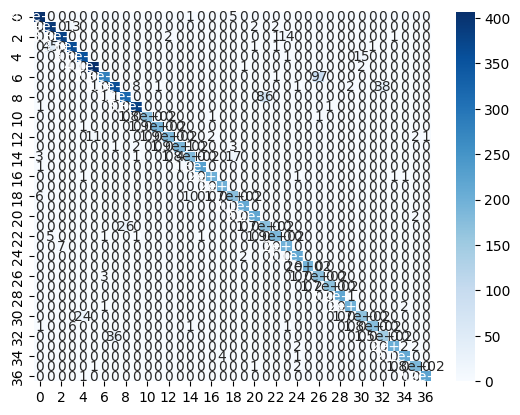

In [71]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

plt.savefig("Confusion Matrix.png", dpi=1000, format='png')
plt.show()

In [72]:
new_arr = confusion_matrix

In [73]:
total = 0
for i in range(0, len(new_arr[0])) : 
    for j in range(0, len(new_arr[0])) : 
        total += new_arr[i][j]

In [74]:
tp, fp, fn, tn = [], [], [], []
precision, recall, f1_score, accuracy = [], [], [], []

for i in range(0,len(new_arr[0])) : 
    tp.append(new_arr[i][i])
    temp_fp = 0
    temp_fn = 0
    for k in range(0,len(new_arr[0])) :
        temp_fp += new_arr[i][k]
        temp_fn += new_arr[k][i]
    fp.append(temp_fp - new_arr[i][i])
    fn.append(temp_fn - new_arr[i][i])

for i in range(0,len(new_arr[0])) : 
    tn.append(total-(tp[i]+fp[i]+fn[i]))

for i in range(0,len(new_arr[0])) :  
    precision.append(tp[i]/(tp[i]+fp[i]))
    recall.append(tp[i]/(tp[i]+fn[i]))
    f1_score.append((2*precision[i]*recall[i])/(precision[i]+recall[i]))
    accuracy.append((tp[i]+tn[i])/total)

In [75]:
with open('log_precision.csv', 'w') as f:
    np.savetxt(f, precision, delimiter=';')
with open('log_recall.csv', 'w') as f:
    np.savetxt(f, recall, delimiter=';')
with open('log_f1_score.csv', 'w') as f:
    np.savetxt(f, f1_score, delimiter=';')
with open('log_accuracy.csv', 'w') as f:
    np.savetxt(f, accuracy, delimiter=';')
with open('log_accuracy.csv', 'w') as f:
    np.savetxt(f, accuracy, delimiter=';')
    
with open('tp.csv', 'w') as f:
    np.savetxt(f, tp, delimiter=';')
with open('tn.csv', 'w') as f:
    np.savetxt(f, tn, delimiter=';')
with open('fp.csv', 'w') as f:
    np.savetxt(f, fp, delimiter=';')
with open('fn.csv', 'w') as f:
    np.savetxt(f, fn, delimiter=';')

In [76]:
from tabulate import tabulate
head = ["Sign", "TP", "FP", "FN", "TN", "Precision", "Recall", "F1-Score", "Accuracy "]
# assign data
mydata = []
row = []
for i in range(0, len(tp)) : 
    row = i, tp[i], fp[i], fn[i], tn[i], precision[i], recall[i], f1_score[i], accuracy[i]
    mydata.append(row)

# display table
print(tabulate(mydata, headers=head, tablefmt="simple"))

  Sign    TP    FP    FN    TN    Precision    Recall    F1-Score    Accuracy
------  ----  ----  ----  ----  -----------  --------  ----------  -----------
     0   407     6    12  8975     0.985472  0.97136     0.978365     0.998085
     1   394    17    50  8939     0.958637  0.887387    0.921637     0.992872
     2   379    18     7  8996     0.95466   0.981865    0.968072     0.99734
     3   363    48    19  8970     0.883212  0.950262    0.915511     0.992872
     4   355    16    27  9002     0.956873  0.929319    0.942895     0.995426
     5   407     3    13  8977     0.992683  0.969048    0.980723     0.998298
     6   284    98     6  9012     0.743455  0.97931     0.845238     0.988936
     7   361    51    38  8950     0.876214  0.904762    0.890259     0.990532
     8   321    88    26  8965     0.784841  0.925072    0.849206     0.987872
     9   382     2    12  9004     0.994792  0.969543    0.982005     0.998511
    10   176     2     0  9222     0.988764  1        

In [77]:
total_tp, total_tn, total_fp, total_fn, total_accuracy, total_precision, total_recall, total_f1_score = 0, 0, 0, 0, 0, 0, 0, 0

for i in range(0, len(tp)) : 
    total_tp += tp[i]
    total_tn += tn[i]
    total_fp += fp[i]
    total_fn += fn[i]
    total_accuracy += accuracy[i]
    total_precision += precision[i]
    total_recall += recall[i]
    total_f1_score += f1_score[i]

In [78]:
micro_accuracy = (total_tp+total_tn)/(total_tp+total_tn+total_fp+total_fn)
micro_precision = total_tp/(total_tp+total_fp)
micro_recall = total_tp/(total_tp+total_fn)
micro_f1_score = (2*micro_precision*micro_recall)/(micro_precision+micro_recall)

print("Micro-Accuracy  : %.2f" % (micro_accuracy*100),'%')
print("Micro-Precision : %.2f" % (micro_precision*100),'%')
print("Micro-Recall    : %.2f" % (micro_recall*100),'%')
print("Micro-F1-Score  : %.2f" % (micro_f1_score*100),'%')

Micro-Accuracy  : 99.68 %
Micro-Precision : 94.05 %
Micro-Recall    : 94.05 %
Micro-F1-Score  : 94.05 %


In [79]:
macro_accuracy = total_accuracy/47
macro_precision = total_precision/47
macro_recall = total_recall/47
macro_f1_score = total_f1_score/47

print("Macro-Accuracy  : %.2f" % (macro_accuracy*100),'%')
print("Macro-Precision : %.2f" % (macro_precision*100),'%')
print("Macro-Recall    : %.2f" % (macro_recall*100),'%')
print("Macro-F1-Score  : %.2f" % (macro_f1_score*100),'%')

Macro-Accuracy  : 78.47 %
Macro-Precision : 74.57 %
Macro-Recall    : 74.33 %
Macro-F1-Score  : 74.28 %


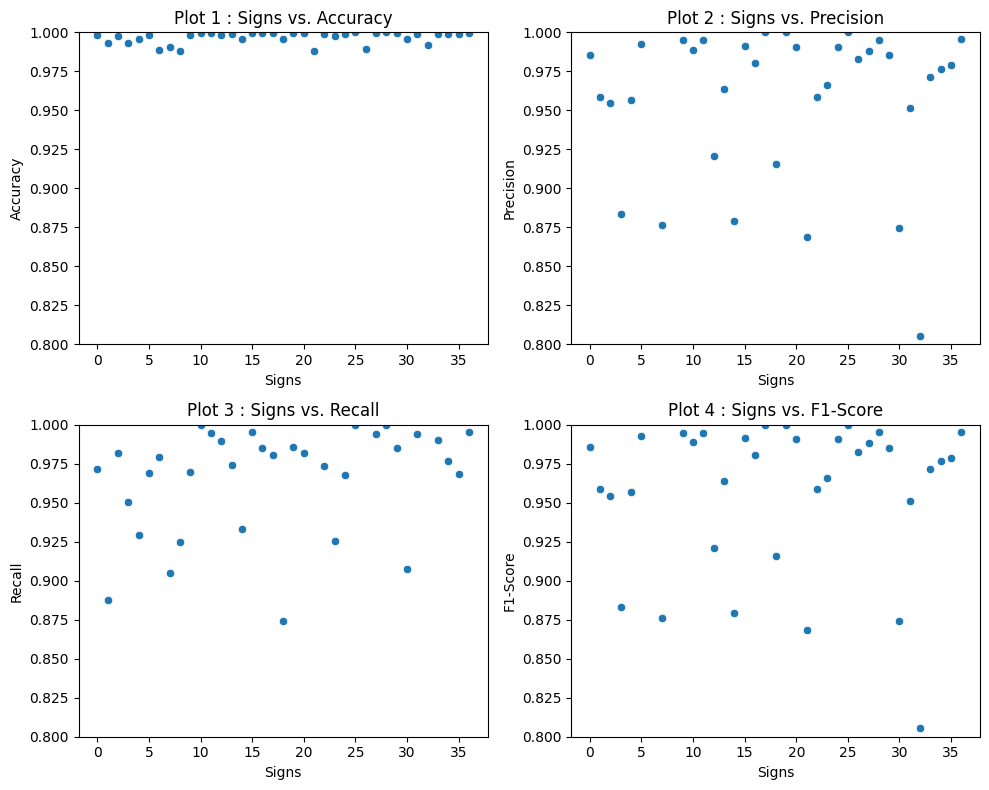

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

signs = []
for i in range(0, len(tp)) : 
    signs.append(i)

# Create figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1 : Signs vs. Accuracy
sns.scatterplot(x=signs, y=accuracy, ax=axs[0,0])
axs[0,0].set_xlabel("Signs")
axs[0,0].set_ylabel("Accuracy")
axs[0,0].set_ylim(.80,1)
axs[0,0].set_title("Plot 1 : Signs vs. Accuracy")

# Plot 2 : Signs vs. Precision
sns.scatterplot(x=signs, y=precision, ax=axs[0,1])
axs[0,1].set_xlabel("Signs")
axs[0,1].set_ylabel("Precision")
axs[0,1].set_ylim(.80,1)
axs[0,1].set_title("Plot 2 : Signs vs. Precision")

# Plot 3 : Signs vs. Recall
sns.scatterplot(x=signs, y=recall, ax=axs[1,0])
axs[1,0].set_xlabel("Signs")
axs[1,0].set_ylabel("Recall")
axs[1,0].set_ylim(.80,1)
axs[1,0].set_title("Plot 3 : Signs vs. Recall")

# Plot 4 : Signs vs. F1-Scores
sns.scatterplot(x=signs, y=precision, ax=axs[1,1])
axs[1,1].set_xlabel("Signs")
axs[1,1].set_ylabel("F1-Score")
axs[1,1].set_ylim(.80,1)
axs[1,1].set_title("Plot 4 : Signs vs. F1-Score")

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig("Individual Scores.png", dpi=1000, format='png')

In [81]:
import pandas as pd

# Define the path to the dataset
dataset_path = "Full Data.csv"  # Replace with the path to your dataset

# Load the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataframe
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the dataframe
print("\nSummary Statistics:")
print(df.describe())


First few rows of the dataset:
                                  Single Image Frame       x00       y00  \
0  C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...  0.301750  0.737279   
1  C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...  0.299187  0.745403   
2  C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...  0.299001  0.716623   
3  C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...  0.299578  0.718547   
4  C:\Users\Gazi Wasif\Desktop\Gazi Wasif\Digits\...  0.300124  0.728031   

        z00       x01       y01       z01       x02       y02       z02  ...  \
0 -0.000035  0.337051  0.777063 -0.212934  0.400149  0.734345 -0.316929  ...   
1 -0.000015  0.333952  0.781933 -0.201781  0.398500  0.737427 -0.298013  ...   
2 -0.000007  0.325937  0.757997 -0.214778  0.378859  0.715401 -0.312374  ...   
3  0.000021  0.330655  0.768182 -0.208415  0.383243  0.733616 -0.303154  ...   
4 -0.000006  0.334805  0.775457 -0.213824  0.394578  0.739853 -0.316968  ...   

        x18       y18       z18